#### <center>Intermediate Python and Software Enginnering</center>


## <center>Section 09 - Object Orientation - Exercise Solutions</center>


### <center>Innovation Scholars Programme</center>
### <center>King's College London, Medical Research Council and UKRI <center>

### Exercises - Part 01

The aim of this exercise is to create a simple Matplotlib Graphics Engine, provided in the last cell.

The first stage is to define two classes. First one is `Point` and encodes a point x and y coordinates. The second one is `Vector` and encodes a vector characterised by an amplitude and an angle. The `Vector` constructor should be initialised using two points, start and end. Use `math.atan2` rather than `math.atan` to compute the angle.

For each class define the following operators
 * `+`, `-`, `*`, `/`
 * Vector and Vector
 * Vector and number
 * Number and Vector
 * `__str__` and `__repr__`


In [4]:
# point line
from math import sqrt, atan2


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)

    def __sub__(self, other):
        return Point(self.x - other.x, self.y - other.y)

    def __mul__(self, other):
        if isinstance(other, Point):
            return Point(self.x * other.x, self.y * other.y)
        else:
            return Point(self.x * other, self.y * other)

    def getx(self):
        return self.x

    def gety(self):
        return self.y

    def __rmul__(self, other):
        return Point.__mul__(self, other)

    def __truediv__(self, other):
        return Point(self.x / other.x, self.y / other.y)

    def __str__(self):
        return "({}, {})".format(self.x, self.y)

    def __repr__(self):
        return "Point" + self.__str__() + ""

    def __getitem__(self, index):
        if index not in (0, 1):
            raise IndexError("index is out of range")

        return self.x if index == 0 else self.y

    def __iter__(self):
        yield self.x
        yield self.y

    def closest_point(self, p0, p1):
        v01 = p1 - p0
        v20 = p0 - self
        t = -(v20.x * v01.x + v20.y * v01.y) / (v01.x ** 2 + v01.y ** 2)
        pt = t * p1 + (1 - t) * p0
        return pt

    @staticmethod
    def interleave(*points):
        return tuple(zip(*points))


class Vector:
    def __init__(self, p0, p1):
        self._start = p0
        self._end = p1

    def length(self):
        t = self._end - self._start
        return sqrt(t.getx() ** 2 + t.gety() ** 2)

    def angle(self):
        t = self._end - self._start
        return atan2(t.getx(), t.gety())

print(Point.closest_point(Point(5, 3), Point(1, 0), Point(10, 0)))

list(Point(1, 2))

(5.0, 0.0)


[1, 2]

In [2]:
p = Point(4, 5)

# The following code should write something like 'Point(4, 5)' to stdout
p

Point(4, 5)

In [3]:
a = Point(1, 2)
b = Point(3, 4)

# The following code should write something like 'Point(3, 8)' to stdout
a * b

Point(3, 8)

In [4]:
a = Point(1, 2)
b = 3

# The following code should write something like 'Point(3, 6)' to stdout
a * b

Point(3, 6)

In [5]:
b * a
# The following code should write something like 'Point(3, 6)' to stdout

Point(3, 6)

In [6]:
a = Point(1, 2)
b = Point(3, 4)

print(a + b)
print(a - b)
print(a / b)

(4, 6)
(-2, -2)
(0.3333333333333333, 0.5)


In [7]:
v = Vector(Point(1, 2), Point(2, 4))
print(v.length())
print(v.angle())

2.23606797749979
0.4636476090008061


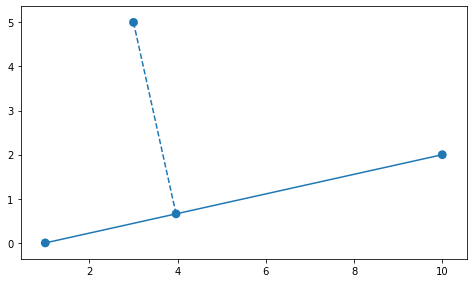

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt


def make_closest_point_plot(p, p0, p1):
    fig, ax = plt.subplots(figsize=(8, 8))
    p10x, p10y = Point.interleave(p0, p1)
    fline10 = plt.Line2D(p10x, p10y)
    ax.add_line(fline10)

    pc = Point.closest_point(p, p0, p1)
    ptxs, ptys = Point.interleave(p, pc)
    flinept = plt.Line2D(ptxs, ptys, ls="dashed")
    ax.add_line(flinept)

    fp0 = plt.Circle(p0, radius=0.1)
    ax.add_patch(fp0)

    fp1 = plt.Circle(p1, radius=0.1)
    ax.add_patch(fp1)

    fp = plt.Circle(p, radius=0.1)
    ax.add_patch(fp)

    fpc = plt.Circle(pc, radius=0.1)
    ax.add_patch(fpc)

    ax.axis("scaled")


make_closest_point_plot(Point(3, 5), Point(1, 0), Point(10, 2))